# Homework 5
### Astrostatistics, University of Washington


## Problem

The flux vs. time plot below shows UV flux measurements for an active M dwarf
star. These stars are known for their exponential bursts of energy, well described
by the profile:

$$\rm{flux(time)} = A\,exp(-\alpha \, t)$$ 

for $t>T$ (recall the MCMC lecture).

Find how many bursts were observed for this star during the provided 2 hour 
stretch of data and estimate their amplitudes (A), decay constants ($\alpha$),
and the time of bursts.

**Hints:**
- There are no more than 2 bursts in this dataset. I.e., you can fit a single-burst model, and then a double-burst model, and then visually compare which one fits better. Show the posteriors plots (like in [fig. 10.25](http://www.astroml.org/book_figures/chapter10/fig_matchedfilt_burst.html)) for both models. **There's no need to do quantitative model-comparison**.
- Use flat priors for A and T and the background (non-bursting) flux level, and Jeffreys' prior, $p(\alpha) \propto \alpha^{-1}$, for $\alpha$
- You can solve this problem by generalizing the code from class.

The data:

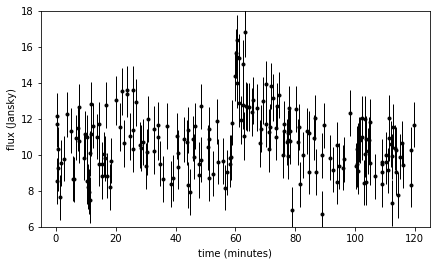

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

# read data
data = np.loadtxt('data/burst.dataset.txt', unpack=True)
t, y_obs, sigma_y = data

# plot data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(t, y_obs, sigma_y, fmt='.', lw=1, c='k')
ax.set_xlim(-5, 125)
ax.set_ylim(6.0, 18.001)
ax.set_xlabel('time (minutes)')
ax.set_ylabel(r'flux (Jansky)')

plt.show()

## Solution

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import plot_mcmc
import pymc3 as pm

In [3]:
# A utility function to convert the traces (chains) to a Pandas DataFrame
def traces_to_pandas(traces, burnin):
    varnames = [ var for var in traces.varnames if not var.endswith("_interval__") ]
    cols = { var: traces[var, :burnin] for var in varnames }
    return pd.DataFrame(cols)

In [ ]:
... your solution here ...

## One burst

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [log_alpha2]
>Metropolis: [T2]
>Metropolis: [A2]
>Metropolis: [b0]
Sampling chain 1, 0 divergences: 100%|██████████| 50500/50500 [00:33<00:00, 1510.93it/s]
The number of effective samples is smaller than 10% for some parameters.


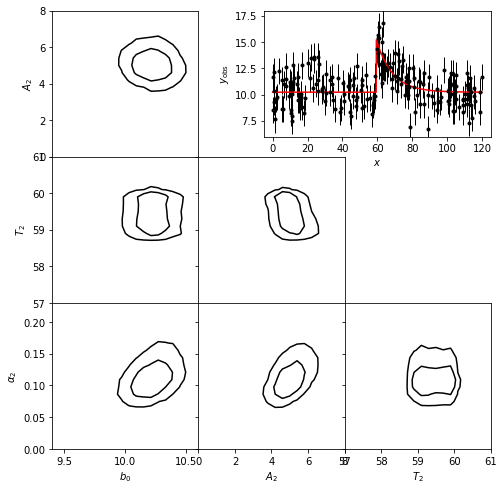

In [47]:
traces = sample_model(two_bursts=False)
plot_traces(traces, figsize=(7, 7))

## Two bursts

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [log_alpha2]
>Metropolis: [T2]
>Metropolis: [A2]
>Metropolis: [log_alpha1]
>Metropolis: [T1]
>Metropolis: [A1]
>Metropolis: [b0]
Sampling chain 1, 0 divergences: 100%|██████████| 50500/50500 [01:24<00:00, 597.01it/s]
The number of effective samples is smaller than 10% for some parameters.


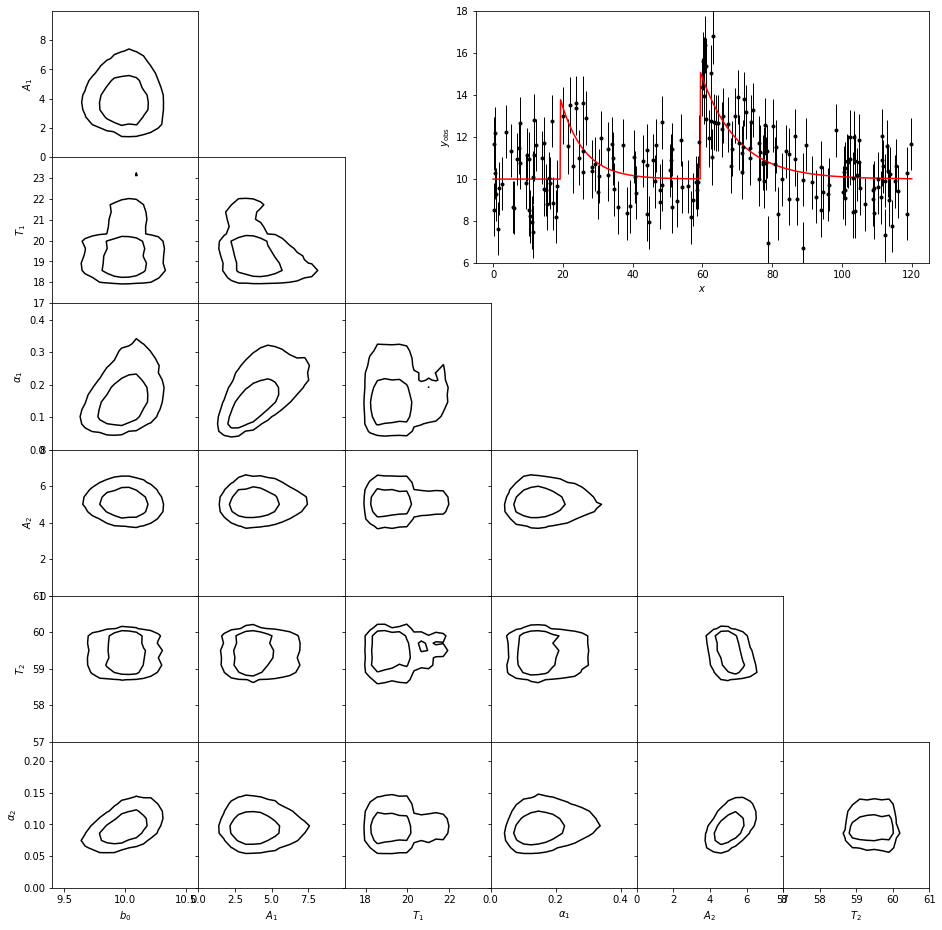

In [45]:
traces = sample_model(two_bursts=True)
plot_traces(traces)